# Linear Regression 실습

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.datasets import load_boston

# 데이터셋 로드
boston = load_boston()

# 데이터프레임 형태로 변환
boston_df = pd.DataFrame(data=boston.data,
                       columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston_df['PRICE'] = boston.target
print(boston_df.shape)

(506, 14)


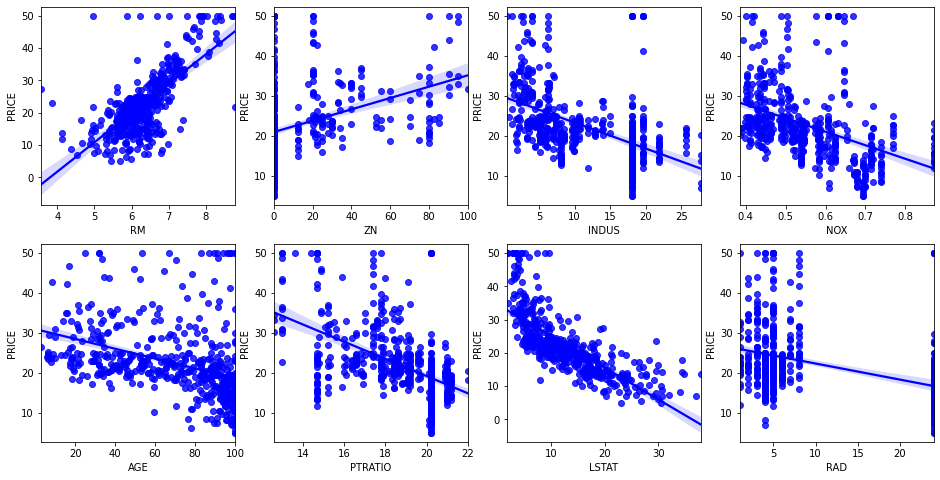

In [49]:
# 각 독립변수가 개별적으로 종속변수와 어떤 상관관계를 갖는지 regplot이용해 나타내보기
import seaborn as sns

#2개의 행과 4개의 열을 가진 subplots만들기
#axs라는 변수에다가 만들어준 subplots들 반환해줌
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
# subplot들로 출력해줄 feature들 할당
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

# 반복문 통해서 subplot그리기 , %는 나머지
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    # subplot마다 regplot이용해서 상관관계 나타내기
    # ax=axs[row][col]의 역할: 사전정의한 subplots들 할당받은 axs에다가 순차적으로 하나의 칸에 plot들 입력하도록 해주는 역할!
    sns.regplot(data=boston_df,x=feature, y='PRICE',
               ax=axs[row][col], color='blue')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
x_feature = boston_df.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_feature,
                                                   y_target,
                                                   test_size=0.3,
                                                   random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE score: {mse}")
print(f"RMSE scroe : {rmse}")
print(f"결정 계수 : {r2}")

MSE score: 21.517444231177638
RMSE scroe : 4.638689926172867
결정 계수 : 0.7112260057484874


In [27]:
# 절편값과 회귀계수값 출력해보기
print("절편값 : ", lr.intercept_)
print("회귀계수값 :", np.round(lr.coef_,1))

절편값 :  31.631084035691632
회귀계수값 : [ -0.1   0.    0.    3.1 -15.4   4.1  -0.   -1.4   0.2  -0.   -0.9   0.
  -0.5]


In [30]:
# 회귀계수값들과 변수명 mapping해서 출력해보기
coef = pd.Series(np.round(lr.coef_, 1),
                index=x_train.columns)
coef = coef.sort_values(ascending=False)
coef

RM          4.1
CHAS        3.1
RAD         0.2
B           0.0
TAX        -0.0
AGE        -0.0
INDUS       0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -15.4
dtype: float64

In [35]:
# cross_val_score로 회귀모델 평가 지표 출력해보기
# GridSearchCV도 마찬가지만 해당 라이브러리들은 높은 score 출력이 목적이기 때문에 평가지표 score에 음수(negative)가 붙여서나옴
# 따라서 실질적인 score는 반환값에다가 음수(-)인 -1을 곱해주어서 출력해야 함

from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
x_feature = boston_df.drop(['PRICE'], axis=1, inplace=False)

# cross_val_score는 자체적으로 교차검증해주기 때문에 train_test_split함수 할 필요 없음!
lr = LinearRegression()

nmse = cross_val_score(lr, x_feature, y_target,
                      scoring='neg_mean_squared_error',
                      cv=5)
mse = -1 * nmse
rmse = np.sqrt(mse)
avg_rmse = np.mean(rmse)

print(f"cross_val_score가 반환하는 negative mse:{np.round(nmse,2)}")
print(f"실질적인 mse:{np.round(mse, 2)}")
print(f"RMSE :{np.round(rmse, 2)}")
print(f"평균 RMSE :{avg_rmse :.4f}")

cross_val_score가 반환하는 negative mse:[-12.46 -26.05 -33.07 -80.76 -33.31]
실질적인 mse:[12.46 26.05 33.07 80.76 33.31]
RMSE :[3.53 5.1  5.75 8.99 5.77]
평균 RMSE :5.8287
